## DBpedia Exploratory

In [21]:
from SPARQLWrapper import SPARQLWrapper, JSON
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# URL del endpoint de tu repositorio en GraphDB
# Cambia 'nombre_repositorio' por el que tengas configurado en GraphDB
endpoint = "http://localhost:7200/repositories/GESTDB"

sparql = SPARQLWrapper(endpoint)
sparql.setReturnFormat(JSON)

# Ejemplo de consulta SPARQL para explorar con DBPedia
query = """
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX dbp: <http://dbpedia.org/property/>
PREFIX dbo: <http://dbpedia.org/ontology/>

SELECT DISTINCT ?canal ?sameAs ?p
WHERE {
  
    ?canal owl:sameAs ?sameAs .
    
 SERVICE <https://dbpedia.org/sparql>{
        ?sameAs ?p ?o
    }
}
"""

sparql.setQuery(query)
results = sparql.query().convert()

for result in results["results"]["bindings"]:
    print(result["canal"]["value"], result["sameAs"]["value"], result["p"]["value"])


http://gestdb.org/channel_UCHnyfMqiRRG1u-2MsSQLbXA http://dbpedia.org/resource/Derek_Muller http://www.w3.org/1999/02/22-rdf-syntax-ns#type
http://gestdb.org/channel_UCHnyfMqiRRG1u-2MsSQLbXA http://dbpedia.org/resource/Derek_Muller http://www.w3.org/2002/07/owl#sameAs
http://gestdb.org/channel_UCHnyfMqiRRG1u-2MsSQLbXA http://dbpedia.org/resource/Derek_Muller http://xmlns.com/foaf/0.1/name
http://gestdb.org/channel_UCHnyfMqiRRG1u-2MsSQLbXA http://dbpedia.org/resource/Derek_Muller http://www.w3.org/2000/01/rdf-schema#label
http://gestdb.org/channel_UCHnyfMqiRRG1u-2MsSQLbXA http://dbpedia.org/resource/Derek_Muller http://dbpedia.org/property/name
http://gestdb.org/channel_UCHnyfMqiRRG1u-2MsSQLbXA http://dbpedia.org/resource/Derek_Muller http://xmlns.com/foaf/0.1/depiction
http://gestdb.org/channel_UCHnyfMqiRRG1u-2MsSQLbXA http://dbpedia.org/resource/Derek_Muller http://www.w3.org/ns/prov#wasDerivedFrom
http://gestdb.org/channel_UCHnyfMqiRRG1u-2MsSQLbXA http://dbpedia.org/resource/Derek_Mu

## Wikidata Exploratory

In [22]:
query = """
PREFIX wd:   <http://www.wikidata.org/entity/>
PREFIX wdt:  <http://www.wikidata.org/prop/direct/>
PREFIX owl:  <http://www.w3.org/2002/07/owl#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX schema: <http://schema.org/>

SELECT ?channel ?channelName ?wikidataEntity ?wdLabel ?wdDesc
WHERE {
  ?channel a wd:Q17558136 ;
           owl:sameAs ?wikidataEntity .
  OPTIONAL { ?channel schema:name ?channelName }

  SERVICE <https://query.wikidata.org/sparql> {
    ?wikidataEntity rdfs:label ?wdLabel .
    OPTIONAL { ?wikidataEntity schema:description ?wdDesc }
    FILTER(LANG(?wdLabel) = "en")
    FILTER(LANG(?wdDesc) = "en")
  }
}
LIMIT 50
"""

sparql.setQuery(query)
results = sparql.query().convert()

for result in results["results"]["bindings"]:
    print(result["channel"]["value"], "|", result["channelName"]["value"], "|", result["wikidataEntity"]["value"], "|", result["wdLabel"]["value"], "|", result["wdDesc"]["value"])

http://gestdb.org/channel_UC1_uAIS3r8Vu6JjXWvastJg | Mathologer | http://www.wikidata.org/entity/Q47493094 | Burkard Polster | German mathematician
http://gestdb.org/channel_UC1_uAIS3r8Vu6JjXWvastJg | Mathologer | http://www.wikidata.org/entity/Q66565938 | Mathologer | YouTube channel on mathematics by Burkard Polster
http://gestdb.org/channel_UC36xmz34q02JYaZYKrMwXng | Nate Gentile | http://www.wikidata.org/entity/Q111686858 | Nate Gentile | Uruguayan YouTuber
http://gestdb.org/channel_UCHnyfMqiRRG1u-2MsSQLbXA | Veritasium | http://www.wikidata.org/entity/Q7921397 | Veritasium | YouTube channel created by Derek Muller
http://gestdb.org/channel_UCJ0-OtVpF0wOKEqT2Z1HEtA | ElectroBOOM | http://www.wikidata.org/entity/Q18643733 | Mehdi Sadaghdar | Iranian-Canadian electrical engineer and comedian
http://gestdb.org/channel_UCJ0-OtVpF0wOKEqT2Z1HEtA | ElectroBOOM | http://www.wikidata.org/entity/Q47472219 | ElectroBOOM | YouTube channel
http://gestdb.org/channel_UCY1kMZp36IQSyNx_9h4mpCg | Ma

## Top 20 videos ordered by total comentaries

In [23]:
query = """
PREFIX wd:  <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX schema: <http://schema.org/>

SELECT ?video ?title ?nComments ?channelName
WHERE {
  ?video a wd:Q63412991 ;          # vídeo
         wdt:P1476 ?title ;        # título
         wdt:P10651 ?nComments ;   # nº comentarios
         wdt:P123 ?channel .       # canal
  ?channel schema:name ?channelName .  # nombre del canal
}
ORDER BY DESC(?nComments)
LIMIT 20
"""

sparql.setQuery(query)
results = sparql.query().convert()

for result in results["results"]["bindings"]:
    print(result["video"]["value"], "|", result["title"]["value"], "|", result["nComments"]["value"], "|", result["channelName"]["value"])

http://gestdb.org/video_pTn6Ewhb27k | Why No One Has Measured The Speed Of Light | 115373 | Veritasium
http://gestdb.org/video_uxPdPpi5W4o | Why Are 96,000,000 Black Balls on This Reservoir? | 84811 | Veritasium
http://gestdb.org/video_bHIhgxav9LY | The Big Misconception About Electricity | 82905 | Veritasium
http://gestdb.org/video_094y1Z2wpJg | The Simplest Math Problem No One Can Solve - Collatz Conjecture | 80837 | Veritasium
http://gestdb.org/video_OxGsU8oIWjY | How An Infinite Hotel Ran Out Of Room | 79104 | Veritasium
http://gestdb.org/video_Grv1RJkdyqI | I Asked Bill Gates What's The Next Crisis? | 75784 | Veritasium
http://gestdb.org/video_W9tgtrWNFdc | Una Vídeo Respuesta a "DIOS EXISTE" | 65553 | QuantumFracture
http://gestdb.org/video_yCsgoLc_fzI | A Physics Prof Bet Me $10,000 I'm Wrong | 57786 | Veritasium
http://gestdb.org/video_YxELlBMP6W4 | Puedo Convencerte de que la Tierra es Plana | 55421 | QuantumFracture
http://gestdb.org/video_XRr1kaXKBsU | What Everyone Gets Wro

## Amount of videos for each channel

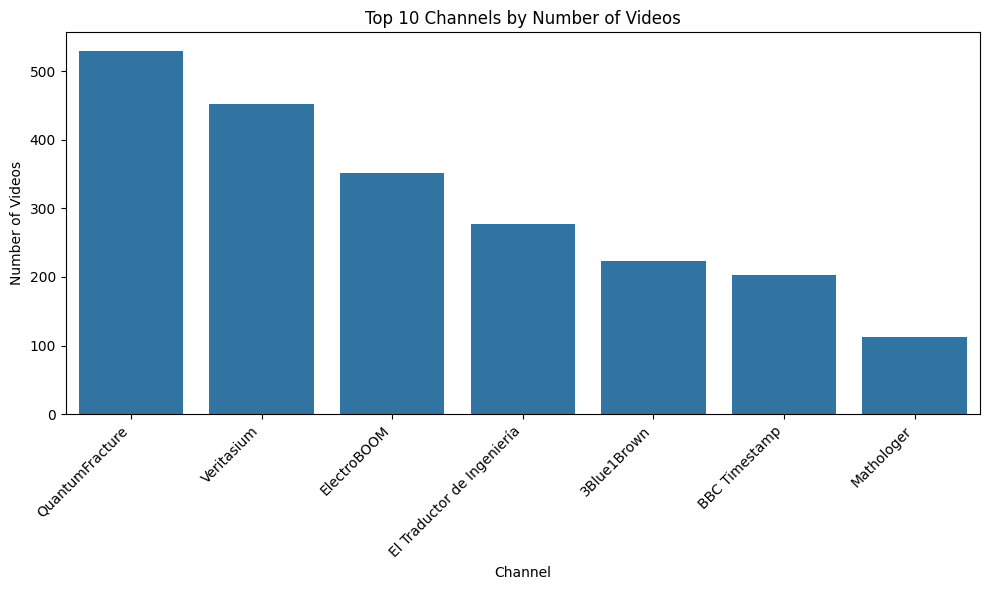

In [24]:
query = """
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>

PREFIX schema: <http://schema.org/>
SELECT ?channelName (COUNT(?video) AS ?numVideos)
WHERE {
  ?video a wd:Q63412991 ;
         wdt:P123 ?channel .
  ?channel schema:name ?channelName .
}
GROUP BY ?channelName
ORDER BY DESC(?numVideos)
LIMIT 10
"""

sparql.setQuery(query)
results = sparql.query().convert()

# Convert results to DataFrame
data = []
for result in results["results"]["bindings"]:
  channel_name = result["channelName"]["value"]
  num_videos = int(result["numVideos"]["value"])
  data.append({
    "Channel": channel_name,
    "NumVideos": num_videos
  })

df_videos_per_channel = pd.DataFrame(data)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x="Channel", y="NumVideos", data=df_videos_per_channel)
plt.xticks(rotation=45, ha="right")
plt.xlabel("Channel")
plt.ylabel("Number of Videos")
plt.title("Top 10 Channels by Number of Videos")
plt.tight_layout()
plt.show()

## Citizien of each Youtuber

In [25]:
query = """
PREFIX wd:   <http://www.wikidata.org/entity/>
PREFIX wdt:  <http://www.wikidata.org/prop/direct/>
PREFIX owl:  <http://www.w3.org/2002/07/owl#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX schema: <http://schema.org/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
PREFIX foaf: <http://xmlns.com/foaf/0.1/>

SELECT DISTINCT ?channel
				?channelName
       (COALESCE(?presenterLabel, ?wdLabel, ?prefLabel, ?schemaLabel, ?foafLabel) AS ?personName)
       (COALESCE(?presenterCountryLabel, ?citizenLabel) AS ?nationality)
WHERE {
  ?channel a wd:Q17558136 ;
           schema:name ?channelName ;
           owl:sameAs ?wikidataEntity .
  FILTER(STRSTARTS(STR(?wikidataEntity), "http://www.wikidata.org/entity/"))

  SERVICE <https://query.wikidata.org/sparql> {
    # Nombre del canal si es persona
    OPTIONAL { ?wikidataEntity rdfs:label ?wdLabel . FILTER(LANG(?wdLabel) IN ("en")) }

    # Nacionalidad si el canal es persona
    OPTIONAL {
      ?wikidataEntity wdt:P27 ?citizen .
      ?citizen rdfs:label ?citizenLabel .
      FILTER(LANG(?citizenLabel) IN ("en"))
    }

    # Presentador o creador con su país
    OPTIONAL {
      ?wikidataEntity (wdt:P371|wdt:P175|wdt:P170) ?presenter .
      ?presenter rdfs:label ?presenterLabel .
      FILTER(LANG(?presenterLabel) IN ("en"))
      OPTIONAL {
        ?presenter wdt:P27 ?presenterCountry .
        ?presenterCountry rdfs:label ?presenterCountryLabel .
        FILTER(LANG(?presenterCountryLabel) IN ("en"))
      }
    }
  }
}
ORDER BY ?personName
"""

sparql.setQuery(query)
results = sparql.query().convert()

for result in results["results"]["bindings"]:
    channel = result["channel"]["value"]
    channel_name = result["channelName"]["value"]
    person_name = result.get("personName", {}).get("value", "N/A")
    nationality = result.get("nationality", {}).get("value", "N/A")
    print(channel, "|", channel_name, "|", person_name, "|", nationality)

http://gestdb.org/channel_UCbdSYaPD-lr1kW27UJuk8Pw | QuantumFracture | N/A | Spain
http://gestdb.org/channel_UC1_uAIS3r8Vu6JjXWvastJg | Mathologer | Burkard Polster | Germany
http://gestdb.org/channel_UCHnyfMqiRRG1u-2MsSQLbXA | Veritasium | Derek Muller | Australia
http://gestdb.org/channel_UCYO_jab_esuFRV4b17AJtAw | 3Blue1Brown | Grant Sanderson | N/A
http://gestdb.org/channel_UCY1kMZp36IQSyNx_9h4mpCg | Mark Rober | Mark Rober | United States
http://gestdb.org/channel_UCJ0-OtVpF0wOKEqT2Z1HEtA | ElectroBOOM | Mehdi Sadaghdar | Iran
http://gestdb.org/channel_UCJ0-OtVpF0wOKEqT2Z1HEtA | ElectroBOOM | Mehdi Sadaghdar | Canada
http://gestdb.org/channel_UC36xmz34q02JYaZYKrMwXng | Nate Gentile | Nate Gentile | Uruguay


## Number of suscribers on channels grouped by the continent of the Youtuber country

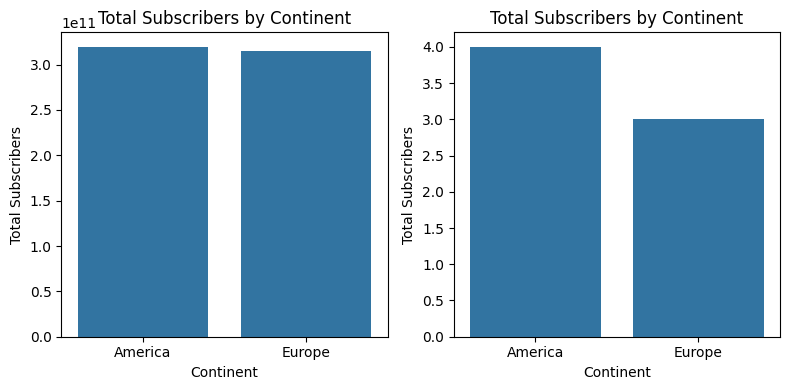

America | 4 | 319626770000
Europe | 3 | 314562320000


In [26]:
query = """
PREFIX wd:   <http://www.wikidata.org/entity/>
PREFIX wdt:  <http://www.wikidata.org/prop/direct/>
PREFIX owl:  <http://www.w3.org/2002/07/owl#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

SELECT ?continentGroup 
       (COUNT(DISTINCT ?channel) AS ?numChannels)
       (SUM(?subs) AS ?totalSubscribers)
WHERE {
  # --- Datos locales (canales) ---
  ?channel a wd:Q17558136 ;
           owl:sameAs ?wikidataEntity ;
           wdt:P3744 ?subs .          # Número de suscriptores (ajústalo si tu propiedad local es otra)
  FILTER(STRSTARTS(STR(?wikidataEntity), "http://www.wikidata.org/entity/"))

  # --- Enriquecimiento federado en Wikidata ---
  SERVICE <https://query.wikidata.org/sparql> {
    # País/nacionalidad del canal o de su presentador
    OPTIONAL { ?wikidataEntity wdt:P27 ?citizen . }      # Canal persona
    OPTIONAL { ?wikidataEntity (wdt:P17|wdt:P495|wdt:P159) ?country . }  # Canal organización

    # Presentador/creador
    OPTIONAL {
      ?wikidataEntity (wdt:P175|wdt:P371|wdt:P170) ?presenter .
      OPTIONAL { ?presenter wdt:P27 ?presenterCountry . }  # Nacionalidad del presentador
    }

    # Obtener un país final en orden de prioridad
    BIND(COALESCE(?presenterCountry, ?citizen, ?country) AS ?finalCountry)

    # Obtener el continente de ese país
    OPTIONAL { ?finalCountry wdt:P30 ?continent . }
  }

  # --- Clasificación del continente ---
  BIND(
    IF(?continent IN (wd:Q46, wd:Q458, wd:Q27468), "Europe",
      IF(?continent IN (wd:Q18, wd:Q49, wd:Q15, wd:Q538), "America", "Other")
    ) AS ?continentGroup
  )
  
  FILTER(?continentGroup IN ("Europe", "America"))
}
GROUP BY ?continentGroup
ORDER BY ?continentGroup
"""

sparql.setQuery(query)
results = sparql.query().convert()

# Convert results to DataFrame
data = []
for result in results["results"]["bindings"]:
  continent = result["continentGroup"]["value"]
  num_channels = int(result["numChannels"]["value"])
  total_subs = int(result["totalSubscribers"]["value"])
  data.append({
    "Continent": continent,
    "Channels": num_channels,
    "Subscribers": total_subs
  })

df_subs = pd.DataFrame(data)

# Plot total subscribers by continent
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
sns.barplot(x="Continent", y="Subscribers", data=df_subs)
plt.xlabel("Continent")
plt.ylabel("Total Subscribers")
plt.tight_layout()
plt.title("Total Subscribers by Continent")
plt.subplot(1, 2, 2)
sns.barplot(x="Continent", y="Channels", data=df_subs)
plt.xlabel("Continent")
plt.ylabel("Total Subscribers")
plt.title("Total Subscribers by Continent")
plt.tight_layout()
plt.show()

# Print the results
for result in results["results"]["bindings"]:
  print(result["continentGroup"]["value"], "|", result["numChannels"]["value"], "|", result["totalSubscribers"]["value"])

## Most Popular video for each category grouped by continents

In [27]:
query = """
PREFIX wd:   <http://www.wikidata.org/entity/>
PREFIX wdt:  <http://www.wikidata.org/prop/direct/>
PREFIX owl:  <http://www.w3.org/2002/07/owl#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX schema: <http://schema.org/>

SELECT ?continentGroup ?categoryName ?title ?channelName ?views
WHERE {
  # --- Video más visto por canal dentro de cada categoría ---
  {
    SELECT ?channel ?category (MAX(?views) AS ?maxViewsChannel)
    WHERE {
      ?video a wd:Q63412991 ;
        wdt:P123 ?channel ;    # canal al que pertenece
        wdt:P910 ?category ;   # categoría del vídeo
        wdt:P5436 ?views .     # número de visualizaciones
    }
    GROUP BY ?channel ?category
  }

  # --- Recuperar los vídeos que cumplen esas condiciones ---
  ?video a wd:Q63412991 ;
    wdt:P123 ?channel ;
    wdt:P910 ?category ;
    wdt:P5436 ?views ;
    wdt:P1476 ?title .
  FILTER(?views = ?maxViewsChannel)

  # --- Obtener el nombre local del canal y categoría ---
  OPTIONAL { ?category wdt:P1476 ?categoryName }
  FILTER(BOUND(?categoryName))

  ?channel schema:name ?channelName .

  # --- Canal enlazado con Wikidata ---
  ?channel owl:sameAs ?wikidataEntity .
  FILTER(STRSTARTS(STR(?wikidataEntity), "http://www.wikidata.org/entity/"))

  # --- Obtener país/continente del canal ---
  SERVICE <https://query.wikidata.org/sparql> {
    OPTIONAL { ?wikidataEntity wdt:P27 ?citizen . }
    OPTIONAL { ?wikidataEntity (wdt:P17|wdt:P495|wdt:P159) ?country . }
    OPTIONAL {
      ?wikidataEntity (wdt:P175|wdt:P371|wdt:P170) ?presenter .
      OPTIONAL { ?presenter wdt:P27 ?presenterCountry . }
    }
    BIND(COALESCE(?presenterCountry, ?citizen, ?country) AS ?finalCountry)
    OPTIONAL { ?finalCountry wdt:P30 ?continent . }
  }

  # --- Clasificación de continentes ---
  BIND(
    IF(?continent IN (wd:Q46, wd:Q458, wd:Q27468), "Europe",
      IF(?continent IN (wd:Q18, wd:Q49, wd:Q15, wd:Q538), "America", "Other")
    ) AS ?continentGroup
  )
  FILTER(?continentGroup IN ("Europe", "America"))
}

ORDER BY ?continentGroup ?categoryName ?channelName
"""

sparql.setQuery(query)
results = sparql.query().convert()
# Process results and create visualization
data = []
for result in results["results"]["bindings"]:
  continent = result["continentGroup"].get("value", pd.NA)
  category = result["categoryName"].get("value", pd.NA)
  title = result["title"].get("value", pd.NA)
  channel = result["channelName"]["value"]
  views = int(result["views"]["value"])
  
  data.append({
    "Continent": continent,
    "Category": category,
    "Video": title,
    "Channel": channel,
    "Views": views
  })

# Convert to DataFrame
df_videos = pd.DataFrame(data)
df_videos = df_videos[df_videos['Channel'] != '3Blue1Brown'].reset_index(drop=True)

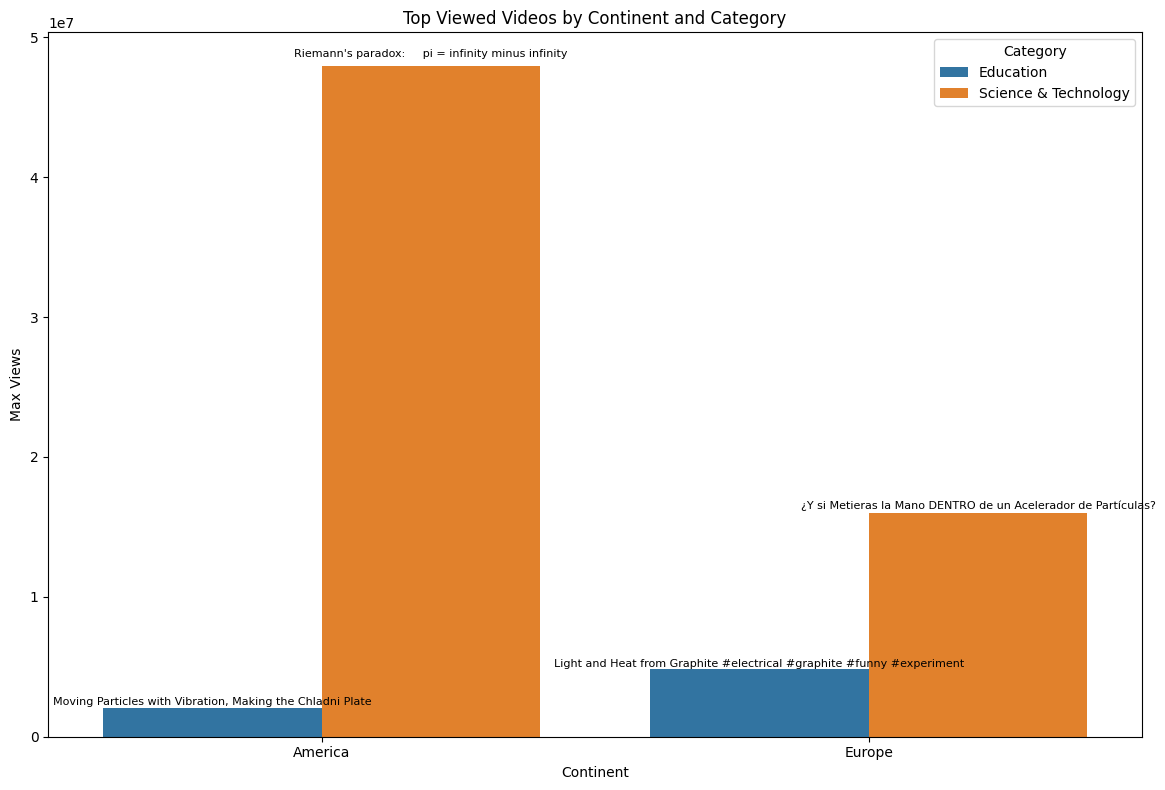

In [28]:
df_continent_summary = df_videos.groupby(['Continent', 'Category']).max().reset_index()

# make a plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x="Continent", y="Views", hue="Category", data=df_continent_summary)
plt.xlabel("Continent")
plt.ylabel("Max Views")
plt.title("Top Viewed Videos by Continent and Category")

# add the video titles on top of the bars
for bar, (_, row) in zip(ax.patches, df_continent_summary.iterrows()):
    height = bar.get_height()
    video_title = row['Video']
    ax.text(
        bar.get_x() + bar.get_width() / 2., 
        height + 0.01 * height, 
        video_title,
        ha="center", va="bottom", fontsize=8, rotation=0
    )

plt.tight_layout()
plt.show()

## Ratio of Max Likes/Views for each channel ordered by birth date

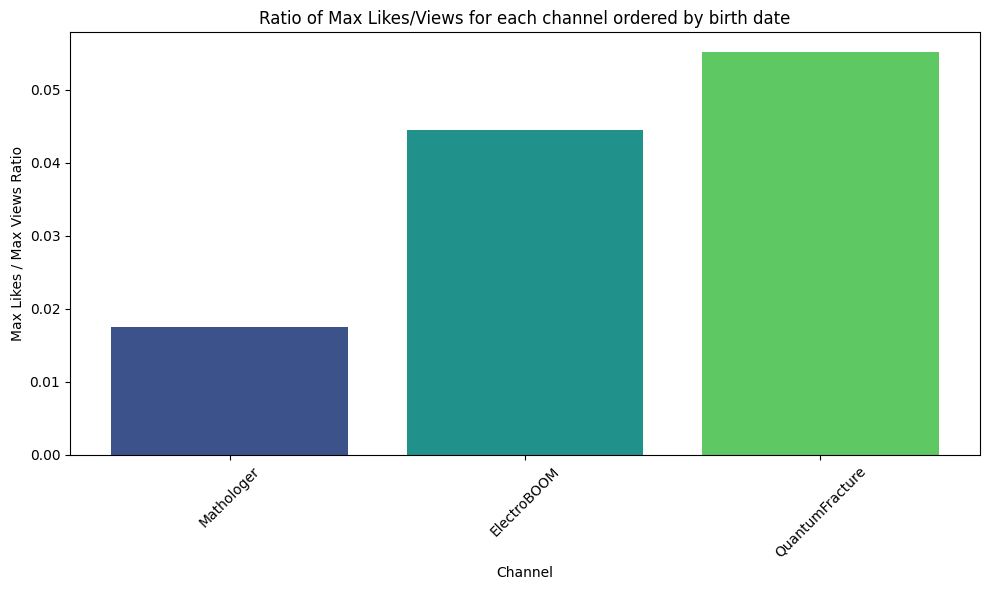

In [29]:
query = """
PREFIX wd:   <http://www.wikidata.org/entity/>
PREFIX wdt:  <http://www.wikidata.org/prop/direct/>
PREFIX owl:  <http://www.w3.org/2002/07/owl#>
PREFIX schema: <http://schema.org/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

SELECT DISTINCT ?channel ?channelName ?wikidataEntity ?birthDate ?maxViews ?maxLikes (?maxLikes/?maxViews as ?ratio)
WHERE {
  ?channel a wd:Q17558136 ;        # Canal de YouTube
           owl:sameAs ?wikidataEntity ;
           schema:name ?channelName .

  FILTER(STRSTARTS(STR(?wikidataEntity), "http://www.wikidata.org/entity/"))

  SERVICE <https://query.wikidata.org/sparql> {
    OPTIONAL { ?wikidataEntity wdt:P569 ?birthDate . }  # Fecha de nacimiento
  }
  {
    SELECT ?channel (MAX(?views) AS ?maxViews)
    WHERE {
      ?video a wd:Q63412991 ;        # Vídeo de YouTube
             wdt:P123 ?channel ;     # Propiedad canal (ajústala si es distinta)
             wdt:P5436 ?views .      # Número de visualizaciones
    }
    GROUP BY ?channel
    }
      {
    SELECT ?channel (MAX(?likes) AS ?maxLikes)
    WHERE {
      ?video a wd:Q63412991 ;        # Vídeo de YouTube
             wdt:P123 ?channel ;     # Propiedad canal (ajústala si es distinta)
             wdt:P10649 ?likes .      # Número de visualizaciones
    }
    GROUP BY ?channel
    }
}
ORDER BY ?birthDate"""

sparql.setQuery(query)
results = sparql.query().convert()

# Convert results to a DataFrame
data = []
for result in results["results"]["bindings"]:
  channel_name = result["channelName"]["value"]
  birth_date = result.get("birthDate", {}).get("value", pd.NA)
  max_views = int(result["maxViews"]["value"])
  max_likes = int(result["maxLikes"]["value"])
  ratio = float(result["ratio"]["value"])
  data.append({
    "Channel": channel_name,
    "BirthDate": birth_date,
    "MaxViews": max_views,
    "MaxLikes": max_likes,
    "Ratio": ratio
  })

df = pd.DataFrame(data)

df = df.dropna(subset=["BirthDate"])

# Plot Ratio vs Channel (ordered by birth date)
df_sorted = df.sort_values("BirthDate")
plt.figure(figsize=(10, 6))
plt.bar(df_sorted["Channel"], df_sorted["Ratio"], color=sns.color_palette("viridis", len(df_sorted)))
plt.xticks(rotation=45)
plt.xlabel("Channel")
plt.ylabel("Max Likes / Max Views Ratio")
plt.title("Ratio of Max Likes/Views for each channel ordered by birth date")
plt.tight_layout()
plt.show()

In [32]:
query = """
PREFIX wd:   <http://www.wikidata.org/entity/>
PREFIX wdt:  <http://www.wikidata.org/prop/direct/>
PREFIX owl:  <http://www.w3.org/2002/07/owl#>
PREFIX schema: <http://schema.org/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

SELECT DISTINCT ?channel ?channelName ?wikidataEntity ?personName ?universityName
WHERE {
  # --- Canal enlazado a Wikidata ---
  ?channel a wd:Q17558136 ;
           schema:name ?channelName ;
           owl:sameAs ?wikidataEntity .
  FILTER(STRSTARTS(STR(?wikidataEntity), "http://www.wikidata.org/entity/"))

  # --- Bloque federado a Wikidata ---
  SERVICE <https://query.wikidata.org/sparql> {
    {
      # Caso: el canal es persona y tiene universidad directamente
      ?wikidataEntity wdt:P69 ?university .
      OPTIONAL { ?wikidataEntity rdfs:label ?personName . FILTER(LANG(?personName)="en") }
      ?university rdfs:label ?universityName .
      FILTER(LANG(?universityName)="en")
    }
    UNION
    {
      # Caso: el canal tiene creador/presentador/performer
      ?wikidataEntity (wdt:P175|wdt:P371|wdt:P170) ?person .
      OPTIONAL { ?person rdfs:label ?personName . FILTER(LANG(?personName)="en") }
      ?person wdt:P69 ?university .
      ?university rdfs:label ?universityName .
      FILTER(LANG(?universityName)="en")
    }
  }
}
ORDER BY ?channelName
"""

sparql.setQuery(query)
results = sparql.query().convert()

# Convert results to a DataFrame
data = []
for result in results["results"]["bindings"]:
  channel_name = result["channelName"]["value"]
  person_name = result.get("personName", {}).get("value", pd.NA)
  university_name = result.get("universityName", {}).get("value", pd.NA)
  data.append({
    "Channel": channel_name,
    "Person": person_name,
    "University": university_name
  })

df = pd.DataFrame(data)

df = df.dropna(subset=["University"])
df = df.drop_duplicates()

df

,Channel,Person,University
0,3Blue1Brown,Grant Sanderson,Stanford University
1,ElectroBOOM,Mehdi Sadaghdar,University of Tehran
2,ElectroBOOM,Mehdi Sadaghdar,Simon Fraser University
5,Mark Rober,Mark Rober,Brigham Young University
6,Mark Rober,Mark Rober,University of Southern California
7,Mathologer,Burkard Polster,Friedrich-Alexander-Universität Erlangen-Nürnberg
9,QuantumFracture,<NA>,Autonomous University of Madrid
10,Veritasium,Derek Muller,Queen's University
11,Veritasium,Derek Muller,University of Sydney
